![car](car.jpg)

Insurance companies invest a lot of [time and money](https://www.accenture.com/_acnmedia/pdf-84/accenture-machine-leaning-insurance.pdf) into optimizing their pricing and accurately estimating the likelihood that customers will make a claim. In many countries insurance it is a legal requirement to have car insurance in order to drive a vehicle on public roads, so the market is very large!

Knowing all of this, On the Road car insurance have requested your services in building a model to predict whether a customer will make a claim on their insurance during the policy period. As they have very little expertise and infrastructure for deploying and monitoring machine learning models, they've asked you to identify the single feature that results in the best performing model, as measured by accuracy, so they can start with a simple model in production.

They have supplied you with their customer data as a csv file called `car_insurance.csv`, along with a table detailing the column names and descriptions below.



## The dataset

| Column | Description |
|--------|-------------|
| `id` | Unique client identifier |
| `age` | Client's age: <br> <ul><li>`0`: 16-25</li><li>`1`: 26-39</li><li>`2`: 40-64</li><li>`3`: 65+</li></ul> |
| `gender` | Client's gender: <br> <ul><li>`0`: Female</li><li>`1`: Male</li></ul> |
| `driving_experience` | Years the client has been driving: <br> <ul><li>`0`: 0-9</li><li>`1`: 10-19</li><li>`2`: 20-29</li><li>`3`: 30+</li></ul> |
| `education` | Client's level of education: <br> <ul><li>`0`: No education</li><li>`1`: High school</li><li>`2`: University</li></ul> |
| `income` | Client's income level: <br> <ul><li>`0`: Poverty</li><li>`1`: Working class</li><li>`2`: Middle class</li><li>`3`: Upper class</li></ul> |
| `credit_score` | Client's credit score (between zero and one) |
| `vehicle_ownership` | Client's vehicle ownership status: <br><ul><li>`0`: Does not own their vehilce (paying off finance)</li><li>`1`: Owns their vehicle</li></ul> |
| `vehcile_year` | Year of vehicle registration: <br><ul><li>`0`: Before 2015</li><li>`1`: 2015 or later</li></ul> |
| `married` | Client's marital status: <br><ul><li>`0`: Not married</li><li>`1`: Married</li></ul> |
| `children` | Client's number of children |
| `postal_code` | Client's postal code | 
| `annual_mileage` | Number of miles driven by the client each year |
| `vehicle_type` | Type of car: <br> <ul><li>`0`: Sedan</li><li>`1`: Sports car</li></ul> |
| `speeding_violations` | Total number of speeding violations received by the client | 
| `duis` | Number of times the client has been caught driving under the influence of alcohol |
| `past_accidents` | Total number of previous accidents the client has been involved in |
| `outcome` | Whether the client made a claim on their car insurance (response variable): <br><ul><li>`0`: No claim</li><li>`1`: Made a claim</li></ul> |

In [72]:
# Import required modules
import pandas as pd
import numpy as np
from statsmodels.formula.api import logit

# Start coding!
df = pd.read_csv('car_insurance.csv')
print(df.head())

       id  age  gender  ... duis past_accidents outcome
0  569520    3       0  ...    0              0     0.0
1  750365    0       1  ...    0              0     1.0
2  199901    0       0  ...    0              0     0.0
3  478866    0       1  ...    0              0     0.0
4  731664    1       1  ...    0              1     1.0

[5 rows x 18 columns]


In [73]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   10000 non-null  int64  
 1   age                  10000 non-null  int64  
 2   gender               10000 non-null  int64  
 3   driving_experience   10000 non-null  object 
 4   education            10000 non-null  object 
 5   income               10000 non-null  object 
 6   credit_score         9018 non-null   float64
 7   vehicle_ownership    10000 non-null  float64
 8   vehicle_year         10000 non-null  object 
 9   married              10000 non-null  float64
 10  children             10000 non-null  float64
 11  postal_code          10000 non-null  int64  
 12  annual_mileage       9043 non-null   float64
 13  vehicle_type         10000 non-null  object 
 14  speeding_violations  10000 non-null  int64  
 15  duis                 10000 non-null  

In [74]:
df['education'].value_counts()

high school    4157
university     3928
none           1915
Name: education, dtype: int64

In [75]:
df.corr()

,id,age,gender,credit_score,vehicle_ownership,married,children,postal_code,annual_mileage,speeding_violations,duis,past_accidents,outcome
id,1.000000,0.013512,-0.007343,0.001704,0.009197,0.014826,0.001233,0.006038,-0.002217,0.008156,0.009268,0.001831,-0.010506
age,0.013512,1.000000,0.005929,0.495495,0.272140,0.384759,0.383708,0.008553,-0.278073,0.458413,0.281937,0.431061,-0.448463
gender,-0.007343,0.005929,1.000000,-0.081587,0.007385,0.008393,-0.002640,-0.001996,-0.015845,0.202095,0.094202,0.223202,0.107208
credit_score,0.001704,0.495495,-0.081587,1.000000,0.312037,0.281238,0.220658,0.009040,-0.174453,0.204542,0.127366,0.180978,-0.325286
vehicle_ownership,0.009197,0.272140,0.007385,0.312037,1.000000,0.175626,0.125990,-0.004866,-0.097433,0.133868,0.086567,0.119521,-0.378921
married,0.014826,0.384759,0.008393,0.281238,0.175626,1.000000,0.287009,0.012045,-0.462193,0.218855,0.120840,0.215269,-0.262104
children,0.001233,0.383708,-0.002640,0.220658,0.125990,0.287009,1.000000,0.020911,-0.447655,0.220415,0.115354,0.206295,-0.232835
postal_code,0.006038,0.008553,-0.001996,0.009040,-0.004866,0.012045,0.020911,1.000000,-0.133978,0.113686,0.038492,-0.116985,0.095889
annual_mileage,-0.002217,-0.278073,-0.015845,-0.174453,-0.097433,-0.462193,-0.447655,-0.133978,1.000000,-0.323547,-0.116598,-0.195217,0.187154
speeding_violations,0.008156,0.458413,0.202095,0.204542,0.133868,0.218855,0.220415,0.113686,-0.323547,1.000000,0.359838,0.443074,-0.291862


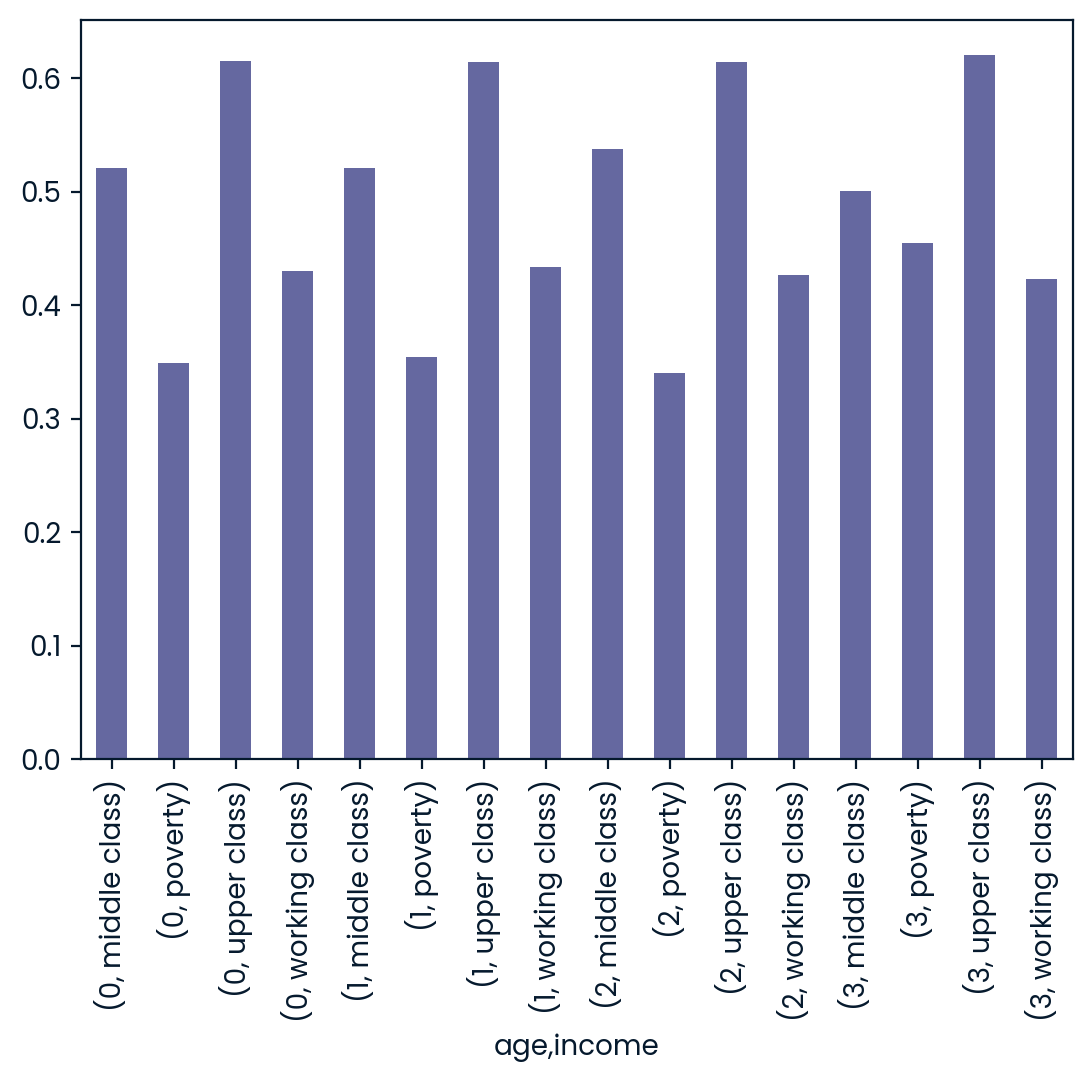

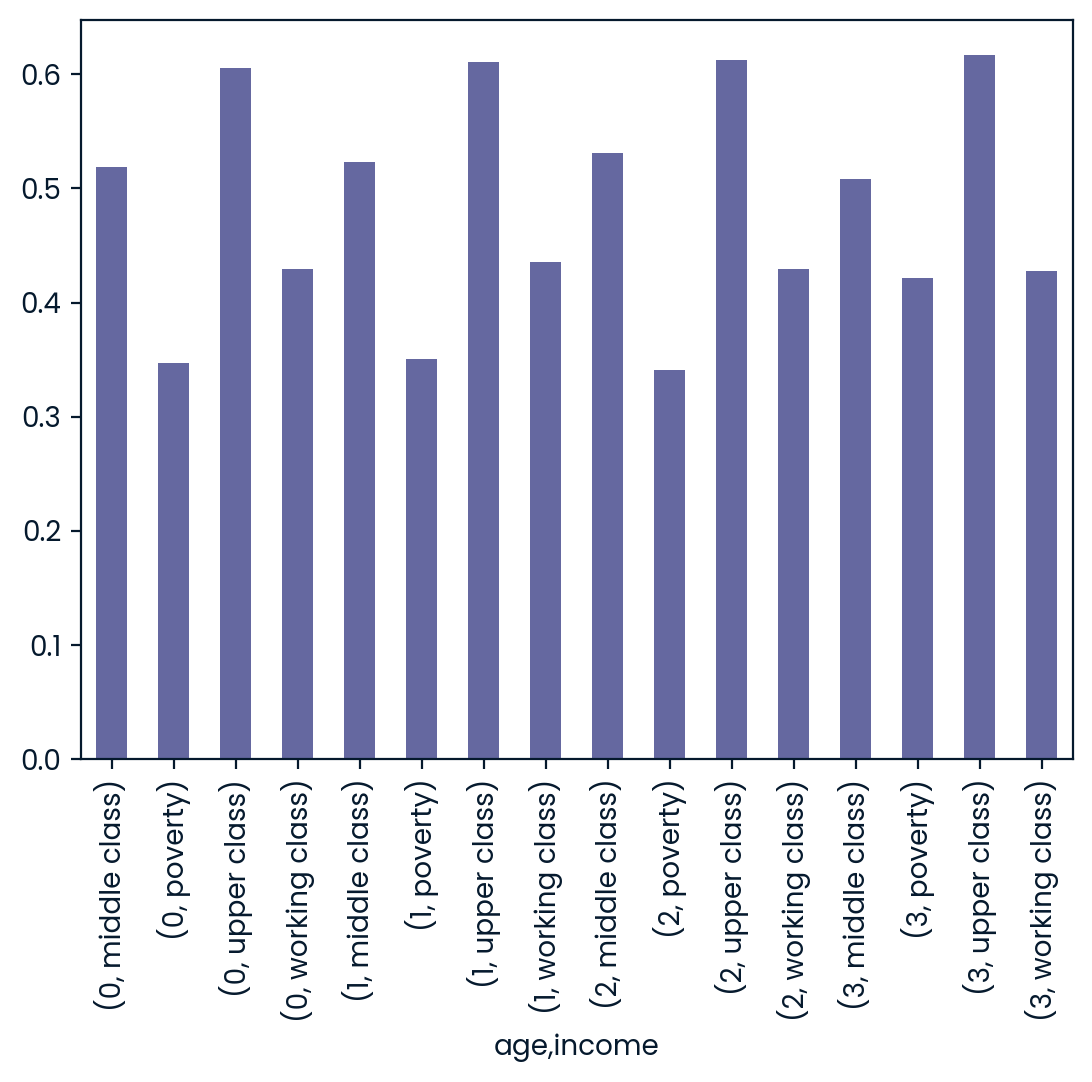

In [76]:
# looking at corr and data, seems like income affects credit score 
# age affects credit score for poor people only
import matplotlib.pyplot as plt
df.groupby(['age', 'income'])['credit_score'].median().plot(kind='bar')
plt.show()
df.groupby(['age', 'income'])['credit_score'].mean().plot(kind='bar')
plt.show()

In [77]:
credit_by_income_dict = df.groupby('income')['credit_score'].mean().to_dict()
print(credit_by_income_dict)
df['credit_score'] = df['credit_score'].fillna(df['income'].map(credit_by_income_dict))
df.info()

{'middle class': 0.5236585383213972, 'poverty': 0.34833133094379176, 'upper class': 0.613826977680088, 'working class': 0.43192928411686077}
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   10000 non-null  int64  
 1   age                  10000 non-null  int64  
 2   gender               10000 non-null  int64  
 3   driving_experience   10000 non-null  object 
 4   education            10000 non-null  object 
 5   income               10000 non-null  object 
 6   credit_score         10000 non-null  float64
 7   vehicle_ownership    10000 non-null  float64
 8   vehicle_year         10000 non-null  object 
 9   married              10000 non-null  float64
 10  children             10000 non-null  float64
 11  postal_code          10000 non-null  int64  
 12  annual_mileage       9043 non-null   float64
 

In [78]:
print(df.groupby(['married', 'children'])['annual_mileage'].mean())

# making a new col for intelligent imputation of annual_mileage
# adding points for marriage and children in new col
df['marr_chd_pts'] = df['married'] + df['children']

subset = ['married', 'children', 'annual_mileage', 'marr_chd_pts']
print(df[subset].corr())

#looks like marriage and children affect annual mileage to some extent 
mileage_by_members = df.groupby('marr_chd_pts')['annual_mileage'].mean().to_dict()
print(mileage_by_members)

#imputation of annual mileage by no of members
df['annual_mileage'] = df['annual_mileage'].fillna(df['marr_chd_pts'].map(mileage_by_members))

married  children
0.0      0.0         14194.760257
         1.0         12029.400079
1.0      0.0         11987.405542
         1.0         10046.912915
Name: annual_mileage, dtype: float64
                 married  children  annual_mileage  marr_chd_pts
married         1.000000  0.287009       -0.462193      0.818933
children        0.287009  1.000000       -0.447655      0.784785
annual_mileage -0.462193 -0.447655        1.000000     -0.566408
marr_chd_pts    0.818933  0.784785       -0.566408      1.000000
{0.0: 14194.760257043994, 1.0: 12019.329507701601, 2.0: 10046.912914532219}


In [79]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   10000 non-null  int64  
 1   age                  10000 non-null  int64  
 2   gender               10000 non-null  int64  
 3   driving_experience   10000 non-null  object 
 4   education            10000 non-null  object 
 5   income               10000 non-null  object 
 6   credit_score         10000 non-null  float64
 7   vehicle_ownership    10000 non-null  float64
 8   vehicle_year         10000 non-null  object 
 9   married              10000 non-null  float64
 10  children             10000 non-null  float64
 11  postal_code          10000 non-null  int64  
 12  annual_mileage       10000 non-null  float64
 13  vehicle_type         10000 non-null  object 
 14  speeding_violations  10000 non-null  int64  
 15  duis                 10000 non-null  

In [80]:
# Remove id and outcomes and store in features list
features = df.drop(columns=["id", "outcome"]).columns

feature_acc = {}

# Looping through each feature
for feature in features:
    model = logit(f"outcome ~ {feature}", data=df).fit()
    conf_matrix = model.pred_table()
    tn = conf_matrix[0,0]
    tp = conf_matrix[1,1]
    fn = conf_matrix[1,0]
    fp = conf_matrix[0,1]
    acc = (tn + tp) / (tn + fn + fp + tp)
    feature_acc[feature] = acc

Optimization terminated successfully.
         Current function value: 0.511794
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.615951
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.467092
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.603742
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.531499
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.564585
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.552412
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.572668
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.586659
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.595431
  

In [81]:
best_feature = max(feature_acc.items(), key= lambda x : x[1])
best_feature_df = pd.DataFrame({
    "best_feature" : best_feature[0],
    "best_accuracy" : best_feature[1],
}, index=[0])
best_feature_df

,best_feature,best_accuracy
0,driving_experience,0.7771
